<a href="https://colab.research.google.com/github/REPANAJYOTHIPRAKASH629/MACHINE_LEARNING/blob/main/ML_EXP_8_randomforest_knn_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00


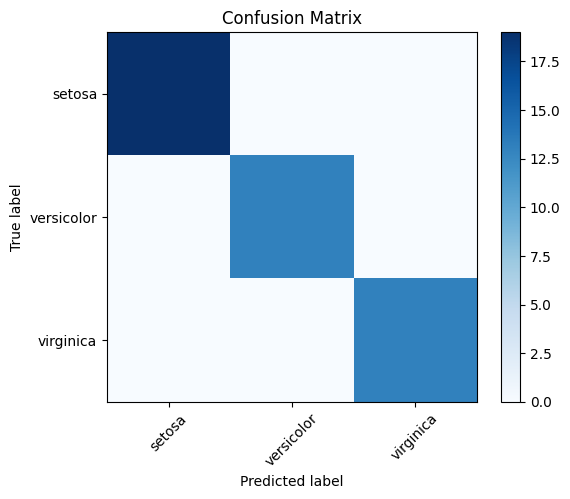

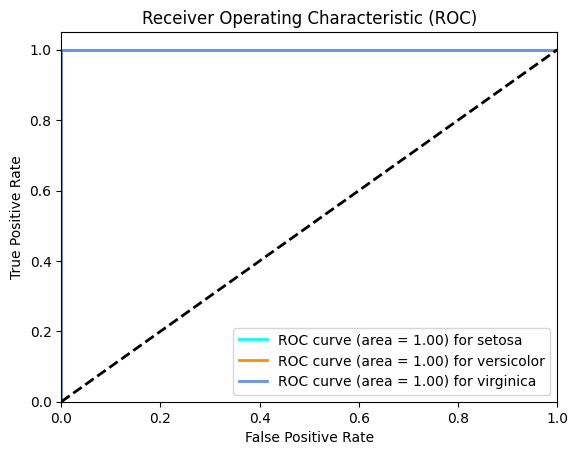

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Binarize the output for ROC curve
y = label_binarize(y, classes=[0, 1, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for {data.target_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Accuracy: 1.00


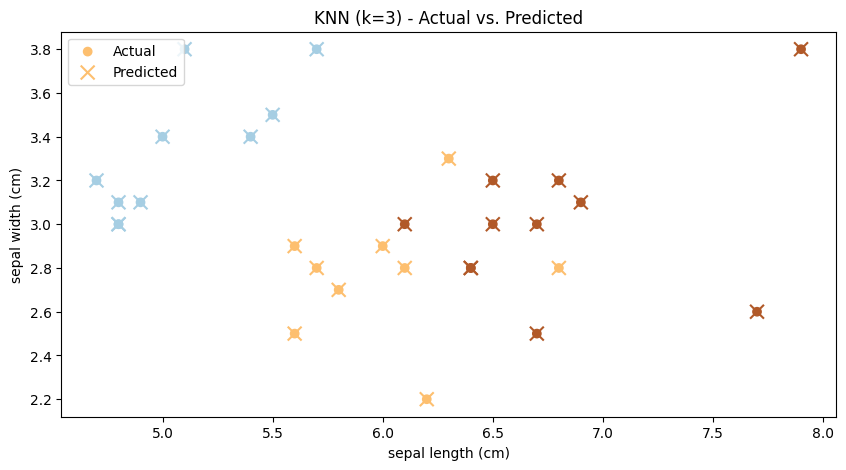

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier with k=3
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the actual vs. predicted labels for a subset of the test set
subset_size = 30
X_subset = X_test[:subset_size]
y_actual_subset = y_test[:subset_size]
y_pred_subset = y_pred[:subset_size]

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_actual_subset, cmap=plt.cm.Paired, label='Actual')
plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_pred_subset, cmap=plt.cm.Paired, marker='x', s=100, label='Predicted')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(loc='best')
plt.title(f'KNN (k={k}) - Actual vs. Predicted')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


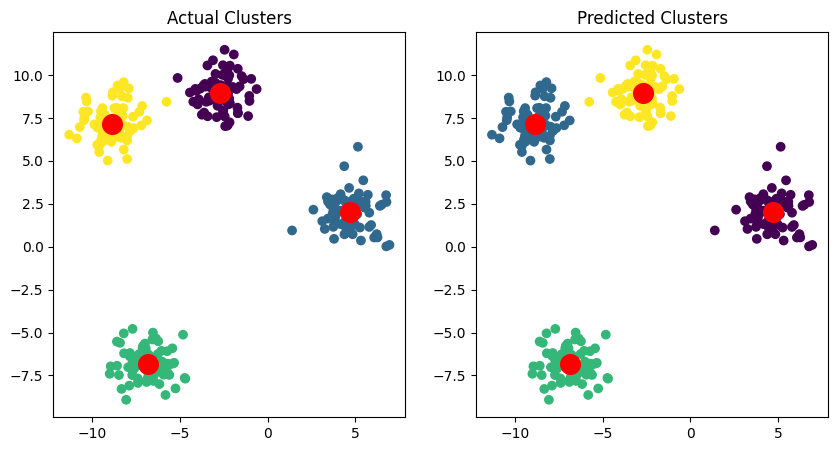

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data for clustering (you can replace this with your dataset)
data, labels = make_blobs(n_samples=300, centers=4, random_state=42)

# Create a KMeans clusterer with the desired number of clusters (k)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
predicted_labels = kmeans.labels_

# Visualize the actual and predicted clusters
plt.figure(figsize=(10, 5))

# Plot the actual data points with true labels
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers')
plt.title('Actual Clusters')

# Plot the predicted cluster assignments
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers')
plt.title('Predicted Clusters')
plt.show()
